In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [ ]:
# Range of time (unit: year)
t = arange(0, 650, 1)
# Range of age (unit: year)
age = arange(1, 1001)
# Concentration of CO2
X_at = [1715 * exp(0.0305 * ti) / (1715 + exp(0.0305 * ti) - 1) + 284 for ti in t]
# Global annual mean temperature
sigma = 4.5
Ts = [15 + (sigma / log(2)) * log(Xa / 285)
      for Xa in X_at]

############# Input #############
x = 0.65
Gamma_Ts = [42.7 + 1.68 * (T - 25) + 0.012 * (T - 25) ** 2 for T in Ts]
Beta_X_Ts = [(3 * x * Xa * Gamma) / ((x * Xa - Gamma) * (x * Xa + 2 * Gamma)) for Xa, Gamma in zip(X_at, Gamma_Ts)]
s0 = 300  # Input at initial time
# Input
S1 = [s0 * (1 + 2.14 * Beta * log(Xa / 285)) for Beta, Xa in zip(Beta_X_Ts, X_at)]
# Temperature scale
Var = [2 ** (0.1 * new - 1.5) for new in Ts]

####  decay rate of the fast and slow carbon, b_11 and b_22
############### b_33 = -0.04/2/5
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
B_11, B_22 = meshgrid(b_11, b_22)
B_21 = 0.3525 / -0.7 * B_11
B_31 = 0.0045 / -0.7 * B_11
B_12 = 0.0103 / -0.23 * B_22
B_32 = 0.001 / -0.23 * B_22
b_33 = -0.04 / 2 / 5
b_13 = 0.02 / 2 / 5
b_23 = 0.02 / 2 / 5

B_11 = ravel(B_11)
B_22 = ravel(B_22)
B_21 = ravel(B_21)
B_31 = ravel(B_31)
B_12 = ravel(B_12)
B_32 = ravel(B_32)

B_t = [mat([
    [b11 * Var[0], b12 * Var[0], b_13 * Var[0]],
    [b21 * Var[0], b22 * Var[0], b_23 * Var[0]],
    [b31 * Var[0], b32 * Var[0], b_33 * Var[0]]])
    for b11, b21, b31, b12, b22, b32 in zip(B_11, B_21, B_31, B_12, B_22, B_32)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum12_a = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (a)', C_sum12_a)

########################################## b_33 = -0.04/5
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
B_11, B_22 = meshgrid(b_11, b_22)
B_21 = 0.3525 / -0.7 * B_11
B_31 = 0.0045 / -0.7 * B_11
B_12 = 0.0103 / -0.23 * B_22
B_32 = 0.001 / -0.23 * B_22
b_33 = -0.04 / 5
b_13 = 0.02 / 5
b_23 = 0.02 / 5

B_11 = ravel(B_11)
B_22 = ravel(B_22)
B_21 = ravel(B_21)
B_31 = ravel(B_31)
B_12 = ravel(B_12)
B_32 = ravel(B_32)

B_t = [mat([
    [b11 * Var[0], b12 * Var[0], b_13 * Var[0]],
    [b21 * Var[0], b22 * Var[0], b_23 * Var[0]],
    [b31 * Var[0], b32 * Var[0], b_33 * Var[0]]])
    for b11, b21, b31, b12, b22, b32 in zip(B_11, B_21, B_31, B_12, B_22, B_32)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum12_b = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (b)', C_sum12_b)

########################################## b_33 = -0.04*2/5
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
B_11, B_22 = meshgrid(b_11, b_22)
B_21 = 0.3525 / -0.7 * B_11
B_31 = 0.0045 / -0.7 * B_11
B_12 = 0.0103 / -0.23 * B_22
B_32 = 0.001 / -0.23 * B_22
b_33 = -0.04 * 2 / 5
b_13 = 0.02 * 2 / 5
b_23 = 0.02 * 2 / 5

B_11 = ravel(B_11)
B_22 = ravel(B_22)
B_21 = ravel(B_21)
B_31 = ravel(B_31)
B_12 = ravel(B_12)
B_32 = ravel(B_32)

B_t = [mat([
    [b11 * Var[0], b12 * Var[0], b_13 * Var[0]],
    [b21 * Var[0], b22 * Var[0], b_23 * Var[0]],
    [b31 * Var[0], b32 * Var[0], b_33 * Var[0]]])
    for b11, b21, b31, b12, b22, b32 in zip(B_11, B_21, B_31, B_12, B_22, B_32)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum12_c = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (c)', C_sum12_c)

####  decay rate of the fast and passive carbon, b_11 and b_33
####################### b_22 = -0.13/5
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_11, B_33 = meshgrid(b_11, b_33)
b_12 = 0.0103 / 5
B_13 = 0.02 / -0.04 * B_33
B_21 = 0.3525 / -0.7 * B_11
b_22 = -0.13 / 5
B_23 = 0.02 / -0.04 * B_33
B_31 = 0.0045 / -0.7 * B_11
b_32 = 0.001 / 5

B_11 = ravel(B_11)
B_33 = ravel(B_33)
B_13 = ravel(B_13)
B_21 = ravel(B_21)
B_23 = ravel(B_23)
B_31 = ravel(B_31)

B_t = [mat([
    [b11 * Var[0], b_12 * Var[0], b13 * Var[0]],
    [b21 * Var[0], b_22 * Var[0], b23 * Var[0]],
    [b31 * Var[0], b_32 * Var[0], b33 * Var[0]]])
    for b11, b21, b31, b13, b23, b33 in zip(B_11, B_21, B_31, B_13, B_23, B_33)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum13_d = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (d)', C_sum13_d)

####################### b_22 = -0.23/5
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_11, B_33 = meshgrid(b_11, b_33)
b_12 = 0.0103 / 5
B_13 = 0.02 / -0.04 * B_33
B_21 = 0.3525 / -0.7 * B_11
b_22 = -0.23 / 5
B_23 = 0.02 / -0.04 * B_33
B_31 = 0.0045 / -0.7 * B_11
b_32 = 0.001 / 5

B_11 = ravel(B_11)
B_33 = ravel(B_33)
B_13 = ravel(B_13)
B_21 = ravel(B_21)
B_23 = ravel(B_23)
B_31 = ravel(B_31)

B_t = [mat([
    [b11 * Var[0], b_12 * Var[0], b13 * Var[0]],
    [b21 * Var[0], b_22 * Var[0], b23 * Var[0]],
    [b31 * Var[0], b_32 * Var[0], b33 * Var[0]]])
    for b11, b21, b31, b13, b23, b33 in zip(B_11, B_21, B_31, B_13, B_23, B_33)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum13_e = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (e)', C_sum13_e)

####################### b_22 = -0.33/5
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_11, B_33 = meshgrid(b_11, b_33)
b_12 = 0.0103 / 5
B_13 = 0.02 / -0.04 * B_33
B_21 = 0.3525 / -0.7 * B_11
b_22 = -0.33 / 5
B_23 = 0.02 / -0.04 * B_33
B_31 = 0.0045 / -0.7 * B_11
b_32 = 0.001 / 5

B_11 = ravel(B_11)
B_33 = ravel(B_33)
B_13 = ravel(B_13)
B_21 = ravel(B_21)
B_23 = ravel(B_23)
B_31 = ravel(B_31)

B_t = [mat([
    [b11 * Var[0], b_12 * Var[0], b13 * Var[0]],
    [b21 * Var[0], b_22 * Var[0], b23 * Var[0]],
    [b31 * Var[0], b_32 * Var[0], b33 * Var[0]]])
    for b11, b21, b31, b13, b23, b33 in zip(B_11, B_21, B_31, B_13, B_23, B_33)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum13_f = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (f)', C_sum13_f)

####  decay rate of the slow and passive carbon, b_22 and b_33
################## b_11=-0.6/5
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_22, B_33 = meshgrid(b_22, b_33)
b_11 = -0.6 / 5
B_12 = 0.0103 / -0.23 * B_22
B_13 = 0.02 / -0.04 * B_33
b_21 = 0.3525 / 5
B_23 = 0.02 / -0.04 * B_33
b_31 = 0.0045 / 5
B_32 = 0.001 / -0.23 * B_22

B_22 = ravel(B_22)
B_33 = ravel(B_33)
B_13 = ravel(B_13)
B_12 = ravel(B_12)
B_23 = ravel(B_23)
B_32 = ravel(B_32)

B_t = [mat([
    [b_11 * Var[0], b12 * Var[0], b13 * Var[0]],
    [b_21 * Var[0], b22 * Var[0], b23 * Var[0]],
    [b_31 * Var[0], b32 * Var[0], b33 * Var[0]]])
    for b12, b22, b32, b13, b23, b33 in zip(B_12, B_22, B_32, B_13, B_23, B_33)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum23_g = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (g)', C_sum23_g)

################## b_11 = -0.7/5
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_22, B_33 = meshgrid(b_22, b_33)
b_11 = -0.7 / 5
B_12 = 0.0103 / -0.23 * B_22
B_13 = 0.02 / -0.04 * B_33
b_21 = 0.3525 / 5
B_23 = 0.02 / -0.04 * B_33
b_31 = 0.0045 / 5
B_32 = 0.001 / -0.23 * B_22

B_22 = ravel(B_22)
B_33 = ravel(B_33)
B_13 = ravel(B_13)
B_12 = ravel(B_12)
B_23 = ravel(B_23)
B_32 = ravel(B_32)

B_t = [mat([
    [b_11 * Var[0], b12 * Var[0], b13 * Var[0]],
    [b_21 * Var[0], b22 * Var[0], b23 * Var[0]],
    [b_31 * Var[0], b32 * Var[0], b33 * Var[0]]])
    for b12, b22, b32, b13, b23, b33 in zip(B_12, B_22, B_32, B_13, B_23, B_33)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum23_h = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (h)', C_sum23_h)

################## b_11 = -0.8/5
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_22, B_33 = meshgrid(b_22, b_33)
b_11 = -0.8 / 5
B_12 = 0.0103 / -0.23 * B_22
B_13 = 0.02 / -0.04 * B_33
b_21 = 0.3525 / 5
B_23 = 0.02 / -0.04 * B_33
b_31 = 0.0045 / 5
B_32 = 0.001 / -0.23 * B_22

B_22 = ravel(B_22)
B_33 = ravel(B_33)
B_13 = ravel(B_13)
B_12 = ravel(B_12)
B_23 = ravel(B_23)
B_32 = ravel(B_32)

B_t = [mat([
    [b_11 * Var[0], b12 * Var[0], b13 * Var[0]],
    [b_21 * Var[0], b22 * Var[0], b23 * Var[0]],
    [b_31 * Var[0], b32 * Var[0], b33 * Var[0]]])
    for b12, b22, b32, b13, b23, b33 in zip(B_12, B_22, B_32, B_13, B_23, B_33)]

S_t = mat([[3 / 10 * S1[0]],
           [7 / 10 * S1[0]],
           [0]])

C_equ_LM = [-B_t[i].I * S_t for i in arange(0, 10000, 1)]
C_sum = hstack(C_equ_LM)
C_sum23_i = log10(array(sum(C_sum, axis=0)).reshape(100, 100))
save('F://论文//模型//Wang//np_file//lastest//Figure. S2 (i)', C_sum23_i)



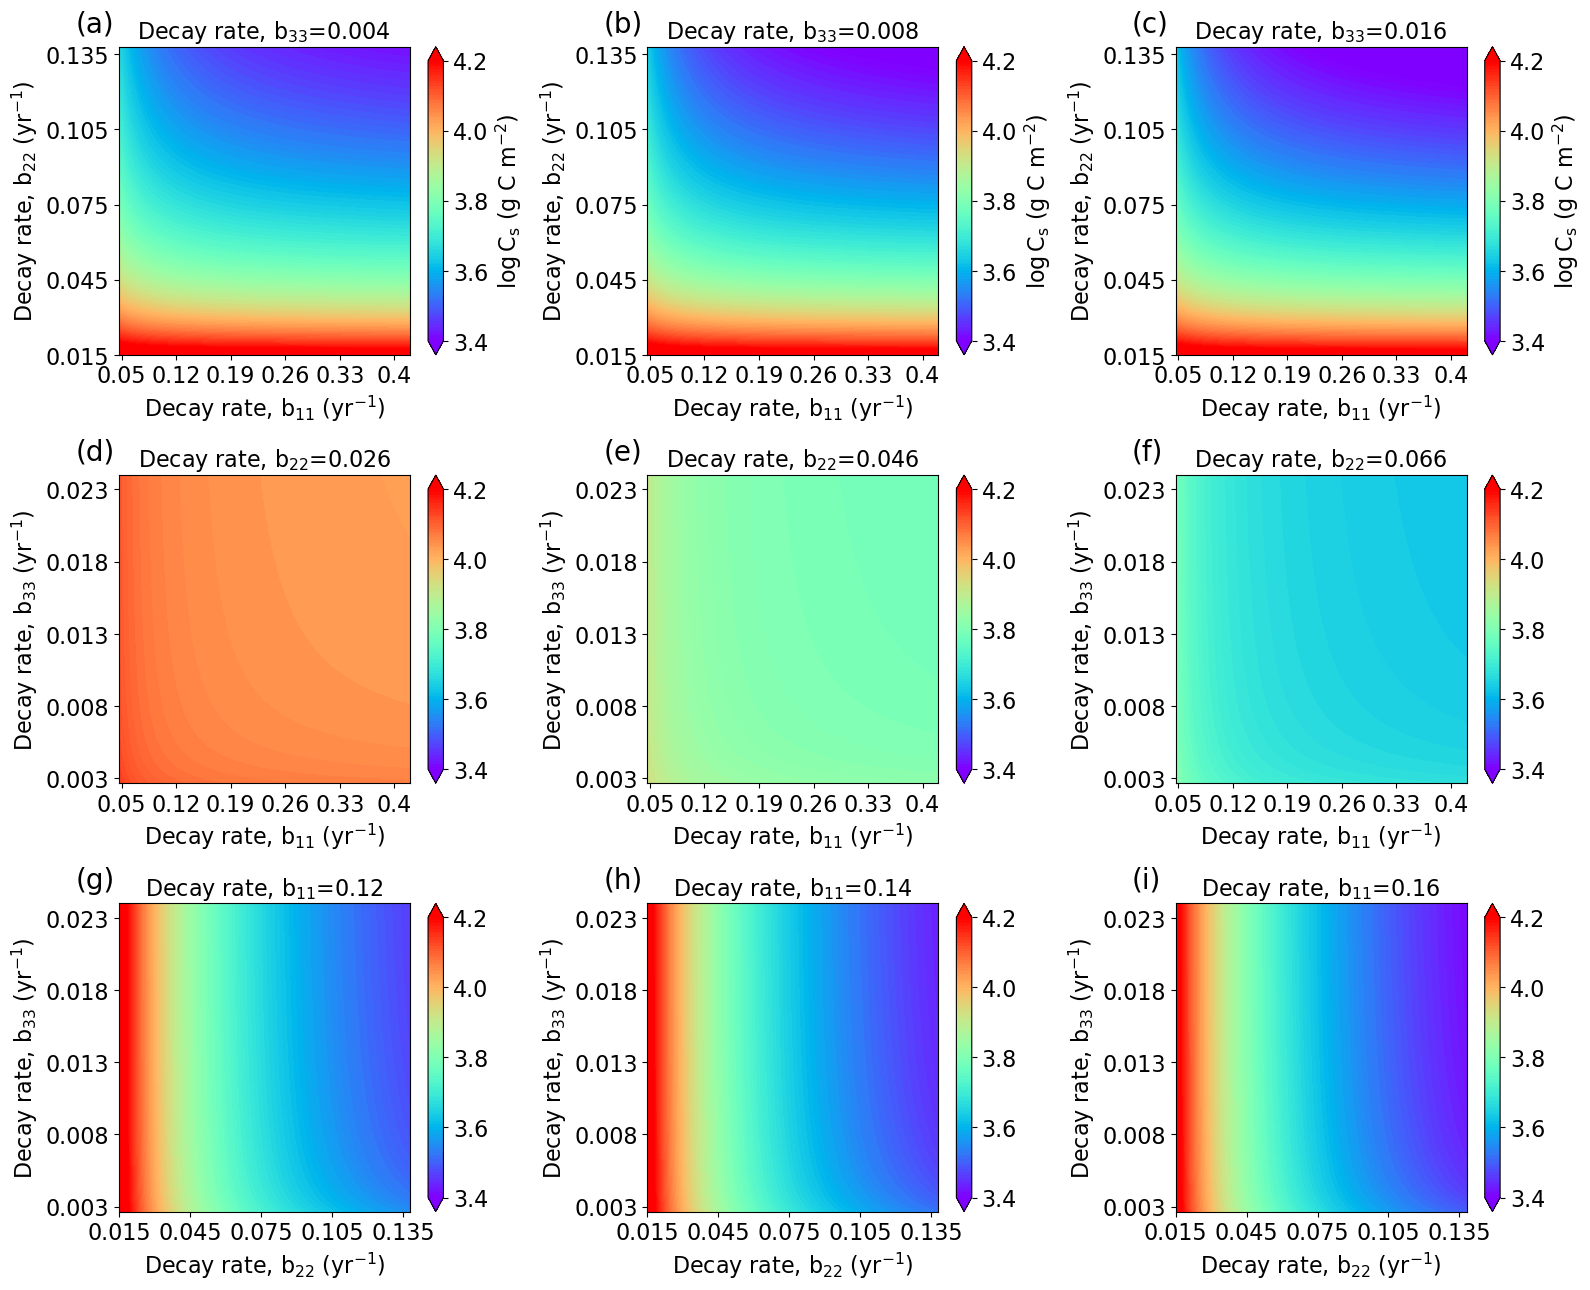

In [8]:
###################################################
###################################################
# plot
###################################################
###################################################

fig = plt.figure(figsize=(16, 13))
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('Decay rate, $\mathregular{b_{33}}$=0.004', fontsize=16)
ax1.text(-0.15,1.05, '(a)', fontsize=20, transform=ax1.transAxes)
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
B_11, B_22 = meshgrid(b_11, b_22)
C_sum12_a = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (a).npy')
b7788 = ax1.contourf(B_11, B_22, C_sum12_a, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax1.set_xlabel('Decay rate, $\mathregular{b_{11}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax1.set_xlim(B_11.max(), B_11.min())
ax1.tick_params(labelsize=16)
ax1.set_xticks([-0.05, -0.12, -0.19, -0.26, -0.33, -0.40])
ax1.set_xticklabels(-1 * ax1.get_xticks())
ax1.set_ylabel('Decay rate, $\mathregular{b_{22}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax1.set_ylim(B_22.max(), B_22.min())
ax1.set_yticks([-0.135, -0.105, -0.075, -0.045, -0.015])
ax1.set_yticklabels(-1 * ax1.get_yticks())
C1 = fig.colorbar(b7788)
C1.set_label('$\log \mathregular{C_s}$ (g C $\mathregular{m^{-2}}$)', fontsize=16)
C1.ax.tick_params(labelsize=16)
C1.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Decay rate, $\mathregular{b_{33}}$=0.008', fontsize=16)
ax2.text(-0.15,1.05, '(b)', fontsize=20, transform=ax2.transAxes)
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
B_11, B_22 = meshgrid(b_11, b_22)
C_sum12_b = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (b).npy')
b7788 = ax2.contourf(B_11, B_22, C_sum12_b, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax2.set_xlabel('Decay rate, $\mathregular{b_{11}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax2.set_xlim(B_11.max(), B_11.min())
ax2.tick_params(labelsize=16)
ax2.set_xticks([-0.05, -0.12, -0.19, -0.26, -0.33, -0.40])
ax2.set_xticklabels(-1 * ax2.get_xticks())
ax2.set_ylabel('Decay rate, $\mathregular{b_{22}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax2.set_ylim(B_22.max(), B_22.min())
ax2.set_yticks([-0.135, -0.105, -0.075, -0.045, -0.015])
ax2.set_yticklabels(-1 * ax2.get_yticks())
C2 = fig.colorbar(b7788)
C2.set_label('$\log \mathregular{C_s}$ (g C $\mathregular{m^{-2}}$)', fontsize=16)
C2.ax.tick_params(labelsize=16)
C2.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decay rate, $\mathregular{b_{33}}$=0.016', fontsize=16)
ax3.text(-0.15,1.05, '(c)', fontsize=20, transform=ax3.transAxes)
b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
B_11, B_22 = meshgrid(b_11, b_22)
C_sum12_c = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (c).npy')
b7788 = ax3.contourf(B_11, B_22, C_sum12_c, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax3.set_xlabel('Decay rate, $\mathregular{b_{11}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax3.set_xlim(B_11.max(), B_11.min())
ax3.tick_params(labelsize=16)
ax3.set_xticks([-0.05, -0.12, -0.19, -0.26, -0.33, -0.40])
ax3.set_xticklabels(-1 * ax3.get_xticks())
ax3.set_ylabel('Decay rate, $\mathregular{b_{22}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax3.set_ylim(B_22.max(), B_22.min())
ax3.set_yticks([-0.135, -0.105, -0.075, -0.045, -0.015])
ax3.set_yticklabels(-1 * ax3.get_yticks())
C3 = fig.colorbar(b7788)
C3.set_label('$\log \mathregular{C_s}$ (g C $\mathregular{m^{-2}}$)', fontsize=16)
C3.ax.tick_params(labelsize=16)
C3.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_11, B_33 = meshgrid(b_11, b_33)
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decay rate, $\mathregular{b_{22}}$=0.026', fontsize=16)
ax4.set_xlabel('Decay rate, $\mathregular{b_{11}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax4.set_ylabel('Decay rate, $\mathregular{b_{33}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
C_sum13_d = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (d).npy')
b7799 = ax4.contourf(B_11, B_33, C_sum13_d, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax4.tick_params(labelsize=16)
ax4.set_xlim(B_11.max(), B_11.min())
ax4.set_xticks([-0.05, -0.12, -0.19, -0.26, -0.33, -0.40])
ax4.set_xticklabels(-1 * ax4.get_xticks())
ax4.set_ylim(B_33.max(), B_33.min())
ax4.set_yticks([-0.023, -0.018, -0.013, -0.008, -0.003])
ax4.set_yticklabels(-1 * ax4.get_yticks())
ax4.text(-0.15,1.05, '(d)', fontsize=20, transform=ax4.transAxes)
C4 = fig.colorbar(b7799)
C4.ax.tick_params(labelsize=16)
C4.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_11, B_33 = meshgrid(b_11, b_33)
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decay rate, $\mathregular{b_{22}}$=0.046', fontsize=16)
ax5.set_xlabel('Decay rate, $\mathregular{b_{11}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax5.set_ylabel('Decay rate, $\mathregular{b_{33}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
C_sum13_e = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (e).npy')
b7799 = ax5.contourf(B_11, B_33, C_sum13_e, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax5.tick_params(labelsize=16)
ax5.set_xlim(B_11.max(), B_11.min())
ax5.set_xticks([-0.05, -0.12, -0.19, -0.26, -0.33, -0.40])
ax5.set_xticklabels(-1 * ax5.get_xticks())
ax5.set_ylim(B_33.max(), B_33.min())
ax5.set_yticks([-0.023, -0.018, -0.013, -0.008, -0.003])
ax5.set_yticklabels(-1 * ax5.get_yticks())
ax5.text(-0.15,1.05, '(e)', fontsize=20, transform=ax5.transAxes)
C5 = fig.colorbar(b7799)
C5.ax.tick_params(labelsize=16)
C5.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

b_11 = linspace(-0.7 / 5 / 3, -0.7 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_11, B_33 = meshgrid(b_11, b_33)
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Decay rate, $\mathregular{b_{22}}$=0.066', fontsize=16)
ax6.set_xlabel('Decay rate, $\mathregular{b_{11}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax6.set_ylabel('Decay rate, $\mathregular{b_{33}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
C_sum13_f = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (f).npy')
b7799 = ax6.contourf(B_11, B_33, C_sum13_f, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax6.tick_params(labelsize=16)
ax6.set_xlim(B_11.max(), B_11.min())
ax6.set_xticks([-0.05, -0.12, -0.19, -0.26, -0.33, -0.40])
ax6.set_xticklabels(-1 * ax6.get_xticks())
ax6.set_ylim(B_33.max(), B_33.min())
ax6.set_yticks([-0.023, -0.018, -0.013, -0.008, -0.003])
ax6.set_yticklabels(-1 * ax6.get_yticks())
ax6.text(-0.15,1.05, '(f)', fontsize=20, transform=ax6.transAxes)
C6 = fig.colorbar(b7799)
C6.ax.tick_params(labelsize=16)
C6.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_22, B_33 = meshgrid(b_22, b_33)
ax7 = fig.add_subplot(3, 3, 7)
ax7.set_title('Decay rate, $\mathregular{b_{11}}$=0.12', fontsize=16)
ax7.set_xlabel('Decay rate, $\mathregular{b_{22}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax7.set_ylabel('Decay rate, $\mathregular{b_{33}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
C_sum23_g = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (g).npy')
b8899 = ax7.contourf(B_22, B_33, C_sum23_g, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax7.set_xlim(B_22.max(), B_22.min())
ax7.set_xticks([-0.135, -0.105, -0.075, -0.045, -0.015])
ax7.set_xticklabels(-1 * ax7.get_xticks())
ax7.set_ylim(B_33.max(), B_33.min())
ax7.set_yticks([-0.023, -0.018, -0.013, -0.008, -0.003])
ax7.set_yticklabels(-1 * ax7.get_yticks())
ax7.text(-0.15,1.05, '(g)', fontsize=20, transform=ax7.transAxes)
C7 = fig.colorbar(b8899)
ax7.tick_params(labelsize=16)
C7.ax.tick_params(labelsize=16)
C7.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_22, B_33 = meshgrid(b_22, b_33)
ax8 = fig.add_subplot(3, 3, 8)
ax8.set_title('Decay rate, $\mathregular{b_{11}}$=0.14', fontsize=16)
ax8.set_xlabel('Decay rate, $\mathregular{b_{22}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax8.set_ylabel('Decay rate, $\mathregular{b_{33}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
C_sum23_h = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (h).npy')
b8899 = ax8.contourf(B_22, B_33, C_sum23_h, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax8.set_xlim(B_22.max(), B_22.min())
ax8.set_xticks([-0.135, -0.105, -0.075, -0.045, -0.015])
ax8.set_xticklabels(-1 * ax7.get_xticks())
ax8.set_ylim(B_33.max(), B_33.min())
ax8.set_yticks([-0.023, -0.018, -0.013, -0.008, -0.003])
ax8.set_yticklabels(-1 * ax7.get_yticks())
ax8.text(-0.15,1.05, '(h)', fontsize=20, transform=ax8.transAxes)
C8 = fig.colorbar(b8899)
ax8.tick_params(labelsize=16)
C8.ax.tick_params(labelsize=16)
C8.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

b_22 = linspace(-0.23 / 5 / 3, -0.23 / 5 * 3, 100)
b_33 = linspace(-0.04 / 5 / 3, -0.04 / 5 * 3, 100)
B_22, B_33 = meshgrid(b_22, b_33)
ax9 = fig.add_subplot(3, 3, 9)
ax9.set_title('Decay rate, $\mathregular{b_{11}}$=0.16', fontsize=16)
ax9.set_xlabel('Decay rate, $\mathregular{b_{22}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
ax9.set_ylabel('Decay rate, $\mathregular{b_{33}}$ ($\mathregular{yr^{-1}}$)', fontsize=16)
C_sum23_i = load('/Users/lianleifu/Downloads/Papers/Wang/np_file/lastest/Figure. S2 (i).npy')
b8899 = ax9.contourf(B_22, B_33, C_sum23_i, 100, cmap='rainbow', extend='both', levels=linspace(3.4, 4.2, 100))
ax9.set_xlim(B_22.max(), B_22.min())
ax9.set_xticks([-0.135, -0.105, -0.075, -0.045, -0.015])
ax9.set_xticklabels(-1 * ax7.get_xticks())
ax9.set_ylim(B_33.max(), B_33.min())
ax9.set_yticks([-0.023, -0.018, -0.013, -0.008, -0.003])
ax9.set_yticklabels(-1 * ax7.get_yticks())
ax9.text(-0.15,1.05, '(i)', fontsize=20, transform=ax9.transAxes)
C9 = fig.colorbar(b8899)
ax9.tick_params(labelsize=16)
C9.ax.tick_params(labelsize=16)
C9.set_ticks([3.4, 3.6, 3.8, 4.0, 4.2])

fig.tight_layout()

plt.savefig('Figure. S2.png', dpi=600)
